In [5]:
#Importing needed libraries
import pandas as pd
import numpy as np
import os
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns


- Demand File

In [6]:
#Reading Files
demand = pd.read_excel('/content/drive/MyDrive/Data Science/Data/Final Project/Demand.xlsx')

demand.info()
demand.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


,DemandDateTime,Demand
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal
17519,2013-12-31 23:30:00,Normal


In [7]:
#Data Cleaning & Transformation

# print(demand['Demand'].unique())
demand['Demand'] = demand['Demand'].replace({'normal': 'Normal', 'Normall': 'Normal', 'high': 'High'})
# print(demand['Demand'].unique())

- Energy Consumption Files

In [8]:
#Data Connection
folder_path = '/content/drive/MyDrive/Data Science/Data/Final Project'

files = os.listdir(folder_path)
dfs = []

for filename in files:
  file_path = folder_path + '/' + filename
  if filename.endswith('.csv'):
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_energy_consumption = pd.concat(dfs, ignore_index = True)
combined_energy_consumption
# combined_energy_consumption.tail()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,"20:00:00 13,12,05",0.061,G,C
1380248,MAC000069,"20:30:00 13,12,05",0.090,G,C
1380249,MAC000069,"21:00:00 13,12,05",0.069,G,C
1380250,MAC000069,"21:30:00 13,12,05",0.084,G,C


In [9]:
#Data Cleaning & Transformation
combined_energy_consumption.rename(columns = {'KWH/hh (per half hour) ' : 'KWH/hh', 'region' : 'Region', 'site_id' : 'Site_id', 'cell_id' : 'Cell_id'}, inplace=True)

combined_energy_consumption['DateTime'] = pd.to_datetime(combined_energy_consumption['DateTime'], format='%H:%M:%S %y,%d,%m')
# df_date = combined_energy_consumption.sort_values(by='DateTime')
# df_date.tail()
#combined_energy_consumption.tail()

In [10]:
# print(combined_energy_consumption.duplicated().any())

# duplicate_rows = combined_energy_consumption[combined_energy_consumption.duplicated()]
# print(duplicate_rows.value_counts())

#Removing duplicated rows
combined_energy_consumption.drop_duplicates(keep = 'first', inplace=True)
combined_energy_consumption.info()

# combined_energy_consumption.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1379310 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Cell_id   1379310 non-null  object        
 1   DateTime  1379310 non-null  datetime64[ns]
 2   KWH/hh    1379310 non-null  float64       
 3   Site_id   1379310 non-null  object        
 4   Region    1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ MB


In [11]:
#combined_energy_consumption['site_id'].unique()

In [12]:
combined_energy_consumption.info()
combined_energy_consumption.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1379310 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Cell_id   1379310 non-null  object        
 1   DateTime  1379310 non-null  datetime64[ns]
 2   KWH/hh    1379310 non-null  float64       
 3   Site_id   1379310 non-null  object        
 4   Region    1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ MB


,Cell_id,DateTime,KWH/hh,Site_id,Region
1380247,MAC000069,2013-05-12 20:00:00,0.061,G,C
1380248,MAC000069,2013-05-12 20:30:00,0.090,G,C
1380249,MAC000069,2013-05-12 21:00:00,0.069,G,C
1380250,MAC000069,2013-05-12 21:30:00,0.084,G,C
1380251,MAC000069,2013-05-12 22:00:00,0.088,G,C


In [13]:
combined_energy_consumption.isnull().sum()

,0
Cell_id,0
DateTime,0
KWH/hh,0
Site_id,0
Region,0


In [14]:
#Checking the total number of cells
combined_energy_consumption['Cell_id'].nunique()

82

In [15]:
#Checking the number of cells in each region
region_summary = combined_energy_consumption.groupby('Region').agg({'Site_id': 'nunique', 'Cell_id': 'nunique'})
print(region_summary)


        Site_id  Cell_id
Region                  
A             4       33
B             5       26
C             4       21
D             1        2


In [16]:
# combined_energy_consumption[combined_energy_consumption ['Region'] == 'D']['Cell_id'].unique()

In [17]:
# #Checking cells that have zero energy consumption
# zero_consumption_cells = combined_energy_consumption[combined_energy_consumption['KWH/hh'] == 0]

# print(zero_consumption_cells['Cell_id'].value_counts())
# print(zero_consumption_cells['Cell_id'].nunique())

# #checking which regions have cells with zero consumption
# zero_consumption_cells['Region'].unique()

# #checking which sites have cells with zero consumption
# zero_consumption_cells['Site_id'].unique()

In [18]:
# #Checking the number of cells with zero values in each region
# zero_consumption = combined_energy_consumption[combined_energy_consumption['KWH/hh'] == 0]

# zeros_in_regions = zero_consumption.groupby('Region')['Cell_id'].nunique().reset_index()
# zeros_in_regions.rename(columns = {'Cell_id': 'Count of zero_Consumption_Cells'}, inplace = True)
# print(zeros_in_regions)

In [19]:
#Checking the number of present records out of 17520 for each cell
time_coverage = combined_energy_consumption.groupby('Cell_id')['DateTime'].agg(['min', 'max', 'count'])
#print(time_coverage)

incomplete_cells = time_coverage[time_coverage['count'] < 15768]
print("Incomplete cells:", incomplete_cells)

Incomplete cells:                  min                 max  count
Cell_id                                        
MAC000008 2013-01-01 2013-10-30 00:00:00  14495
MAC000016 2013-01-01 2013-01-16 00:00:00    721
MAC000028 2013-01-01 2013-10-07 00:00:00  13392
MAC000050 2013-01-01 2013-04-17 00:00:00   5089
MAC000063 2013-01-01 2013-09-23 23:30:00  12767
MAC000080 2013-01-01 2013-05-29 00:00:00   7103
MAC000095 2013-01-01 2013-09-30 00:00:00  13055


- Dropping cells that have more than 90% missing records

In [20]:
#Total number of records a cell should have in a year (30-min intervals)
total_records = 17520

#Defining the 90% threshold for each cell
threshold = 0.9 * total_records

#Counting the number of records for each cell_id
record_counts = combined_energy_consumption['Cell_id'].value_counts()

#Filtering out the cells with fewer than 90% of the records
valid_cell_ids = record_counts[record_counts >= threshold].index

#Filtering the DataFrame to retain only the valid cell_ids
combined_energy_consumption = combined_energy_consumption[combined_energy_consumption['Cell_id'].isin(valid_cell_ids)]

#Verifying the result
print(f"Number of valid cells: {combined_energy_consumption['Cell_id'].nunique()}")
# print(combined_energy_consumption.head())


Number of valid cells: 75


In [21]:
combined_energy_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312688 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Cell_id   1312688 non-null  object        
 1   DateTime  1312688 non-null  datetime64[ns]
 2   KWH/hh    1312688 non-null  float64       
 3   Site_id   1312688 non-null  object        
 4   Region    1312688 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 60.1+ MB


- Building record and filling missing values

In [22]:
start_date = "2013-01-01 00:00:00"
end_date = "2013-12-31 23:30:00"
full_timestamps = pd.date_range(start = start_date, end = end_date, freq = "30min")

#Creating an empty list to store chunks
chunks = []

#Getting unique combinations of region, site_id, and cell_id
unique_cells = combined_energy_consumption[['Region', 'Site_id', 'Cell_id']].drop_duplicates()

#Looping through each unique cell_id
for _, row in unique_cells.iterrows():
    region, site_id, cell_id = row['Region'], row['Site_id'], row['Cell_id']

    #Creating a DataFrame with the full timestamp range for this cell_id
    temp_df = pd.DataFrame({
        'Region': region,
        'Site_id': site_id,
        'Cell_id': cell_id,
        'DateTime': full_timestamps
    })

    #Merging with the original data for this specific cell_id
    cell_data = combined_energy_consumption[(combined_energy_consumption['Region'] == region) & (combined_energy_consumption['Site_id'] == site_id) & (combined_energy_consumption['Cell_id'] == cell_id)]
    temp_df = temp_df.merge(cell_data, on = ['Region', 'Site_id', 'Cell_id', 'DateTime'], how = 'left')

    #Appending the resulting dataframe to the list of chunks
    chunks.append(temp_df)

#Combining all chunks into a single dataframe
combined_energy_consumption = pd.concat(chunks, ignore_index = True)



In [23]:
# combined_energy_consumption.isnull().sum()

In [24]:
# combined_energy_consumption.info()

In [25]:
#Imputing null consumption values with cell medians
combined_energy_consumption['KWH/hh'] = combined_energy_consumption.groupby('Cell_id')['KWH/hh'].transform(
    lambda group: group.fillna(group.median())
)

# combined_energy_consumption.isnull().sum()

In [26]:
#Extracting features from DateTime
combined_energy_consumption['Hour'] = combined_energy_consumption['DateTime'].dt.hour
combined_energy_consumption['Day'] = combined_energy_consumption['DateTime'].dt.day
combined_energy_consumption['DayType'] = np.where(combined_energy_consumption['DateTime'].dt.weekday < 5, 'Weekday', 'Weekend')
combined_energy_consumption['Month'] = combined_energy_consumption['DateTime'].dt.month

def get_season(month):
  if month in [12, 1, 2]:
    return "Winter"
  elif month in [3, 4, 5]:
    return "Spring"
  elif month in [6, 7, 8]:
    return "Summer"
  else:
    return "Autumn"

combined_energy_consumption['Season'] = combined_energy_consumption['Month'].apply(get_season)


#EDA

In [27]:
#Regional energy consumption Dataframes
energy_consumption_region_A = combined_energy_consumption [combined_energy_consumption ['Region'] == 'A'].copy()
energy_consumption_region_B = combined_energy_consumption [combined_energy_consumption ['Region'] == 'B'].copy()
energy_consumption_region_C = combined_energy_consumption [combined_energy_consumption ['Region'] == 'C'].copy()
energy_consumption_region_D = combined_energy_consumption [combined_energy_consumption ['Region'] == 'D'].copy()

In [28]:
# print(combined_energy_consumption.describe())
# print(energy_consumption_region_A.describe())
# print(energy_consumption_region_B.describe())
# print(energy_consumption_region_C.describe())
# print(energy_consumption_region_D.describe())

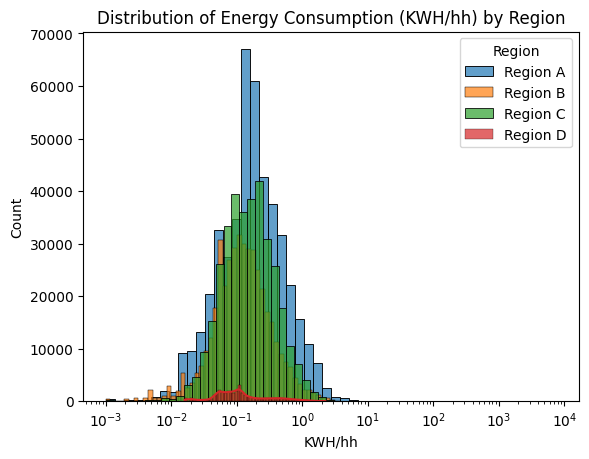

In [29]:
for region in combined_energy_consumption['Region'].unique():
    subset = combined_energy_consumption[combined_energy_consumption['Region'] == region]
    sns.histplot(subset['KWH/hh'], bins = 50, kde = True, log_scale = (True, False), label = f'Region {region}', alpha = 0.7)
plt.legend(title = "Region")
plt.title('Distribution of Energy Consumption (KWH/hh) by Region')
plt.xlabel('KWH/hh')
plt.ylabel('Count')
plt.show()


<ipython-input-30-906ab6a4052d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = region_std, x = 'Region', y = 'KWH/hh', palette = 'plasma')


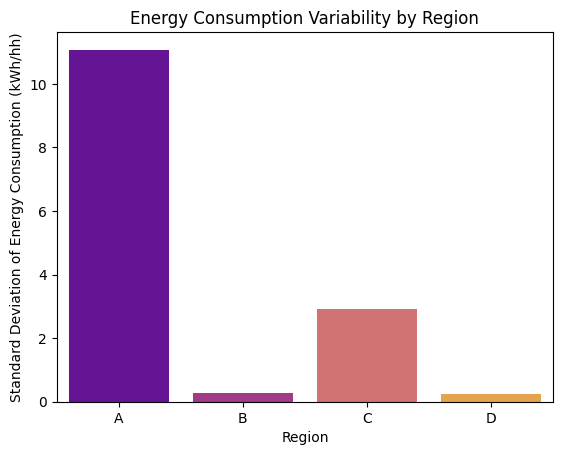

In [30]:
#Visualizing the region with the highest variability
region_std = combined_energy_consumption.groupby('Region')['KWH/hh'].std().reset_index()

sns.barplot(data = region_std, x = 'Region', y = 'KWH/hh', palette = 'plasma')
plt.title('Energy Consumption Variability by Region')
plt.xlabel('Region')
plt.ylabel('Standard Deviation of Energy Consumption (kWh/hh)')
plt.show()


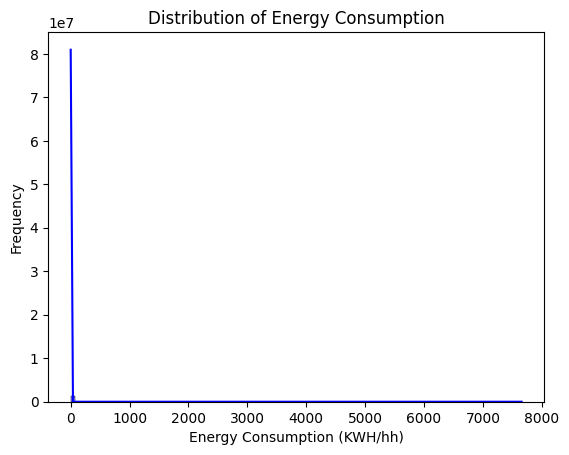

In [31]:
sns.histplot(combined_energy_consumption['KWH/hh'], bins = 100, kde = True, color = 'blue')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')
plt.show()


- The data is heavily right-skewed, dominated by low energy consumption values.

- Extreme values (likely outliers) stretch the x-axis to high values, making the bulk of the data hard to interpret visually.

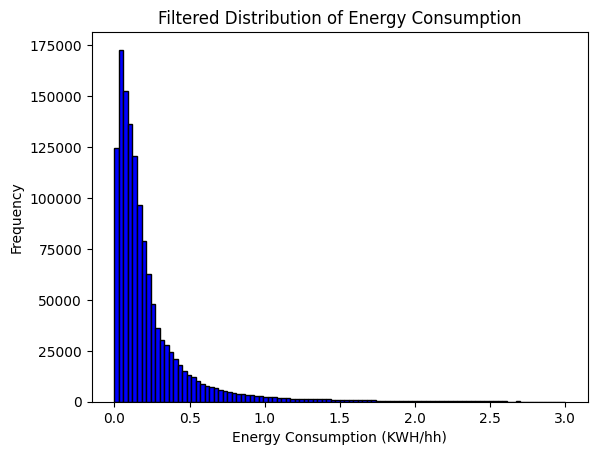

In [32]:
#Plotting histogram with a limited x-axis range
plt.hist(combined_energy_consumption['KWH/hh'], bins = 100, color = 'blue', edgecolor = 'black', range = (0,3))
plt.title('Filtered Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Frequency')
plt.show()


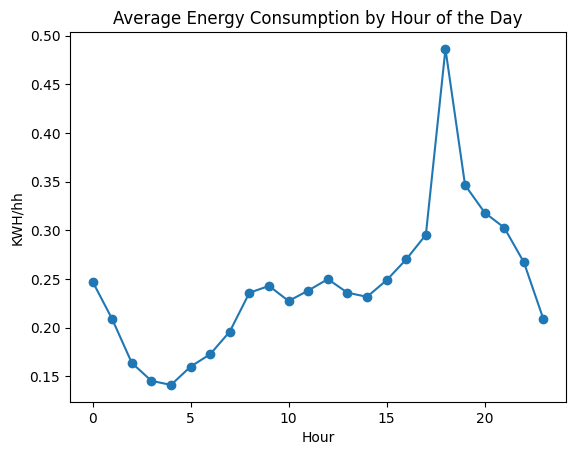

In [33]:
hourly_avg = combined_energy_consumption.groupby('Hour')['KWH/hh'].mean()

plt.plot(hourly_avg, marker = 'o')
plt.title('Average Energy Consumption by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('KWH/hh')
plt.show()


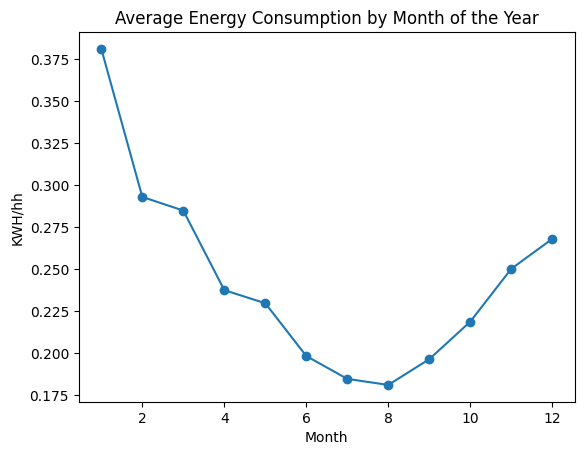

In [34]:
monthly_avg = combined_energy_consumption.groupby('Month')['KWH/hh'].mean()

plt.plot(monthly_avg, marker = 'o')
plt.title('Average Energy Consumption by Month of the Year')
plt.xlabel('Month')
plt.ylabel('KWH/hh')
plt.show()


##Univariate Anomaly Detection

#IQR

The IQR anomaly detection method was applied and anomaly values were imputed with the regional medians and saved as a new column.

In [35]:
regions = [energy_consumption_region_A, energy_consumption_region_B, energy_consumption_region_C, energy_consumption_region_D]
for region in regions:
  q1 = np.quantile(region['KWH/hh'], 0.25)
  q3 = np.quantile(region['KWH/hh'], 0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  region['KWH/hh_AD'] = np.where((region['KWH/hh'] > upper_bound) | (region['KWH/hh'] < lower_bound), 1, 0)
  # print(region['KWH/hh_AD'].value_counts())
  region['KWH/hh_corrected'] = np.where(region['KWH/hh_AD'] == 1, np.median(region['KWH/hh']), region['KWH/hh'])

combined_energy_consumption = pd.concat(regions, ignore_index=True)

In [36]:
#combined_energy_consumption[combined_energy_consumption['KWH/hh_AD'] == 1]

In [37]:
combined_energy_consumption['KWH/hh_corrected'].describe()

,KWH/hh_corrected
count,1.314000e+06
mean,1.574731e-01
std,1.281268e-01
min,0.000000e+00
25%,6.500000e-02
50%,1.260000e-01
75%,2.060000e-01
max,7.090000e-01


In [38]:
# #Checking cell level imputation

# def impute_outliers_cell_level(group):
#   q1 = np.quantile(group['KWH/hh'], 0.25)
#   q3 = np.quantile(group['KWH/hh'], 0.75)
#   iqr = q3 - q1
#   lower_bound = q1 - (1.5 * iqr)
#   upper_bound = q3 + (1.5 * iqr)

#   group['KWH/hh_corrected_cell'] = np.where((group['KWH/hh'] > upper_bound) | (group['KWH/hh'] < lower_bound), group['KWH/hh'].median(), group['KWH/hh'])
#   return group

# combined_energy_consumption = combined_energy_consumption.reset_index(drop=True)
# combined_energy_consumption = combined_energy_consumption.groupby('Cell_id').apply(impute_outliers_cell_level)
# combined_energy_consumption['KWH/hh_corrected_cell'].describe()

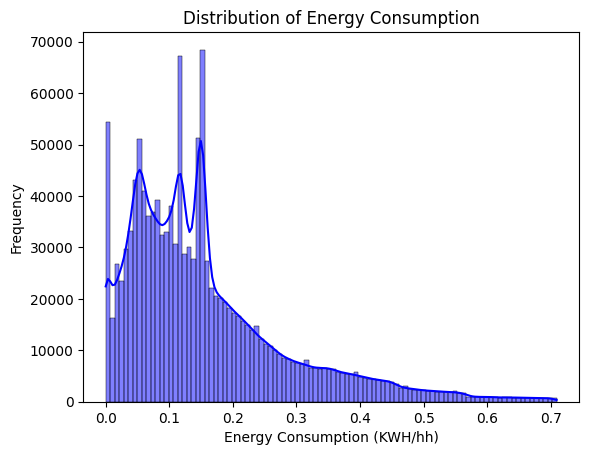

In [39]:
sns.histplot(combined_energy_consumption['KWH/hh_corrected'], bins = 100, kde = True, color = 'blue')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')
plt.show()

<ipython-input-40-51c5dd10fbe0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh', palette = 'plasma')


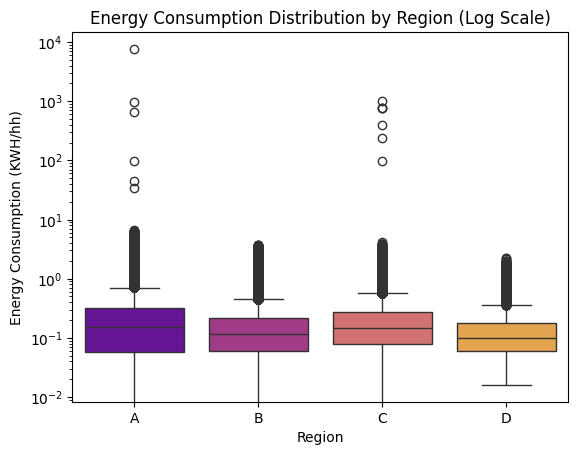

In [40]:
sns.boxplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh', palette = 'plasma')
plt.title('Energy Consumption Distribution by Region (Log Scale)')
plt.ylabel('Energy Consumption (KWH/hh)')
plt.xlabel('Region')
plt.yscale('log')

<ipython-input-41-d7aaaa30555d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh_corrected', palette = "plasma")


Text(0.5, 0, 'Region')

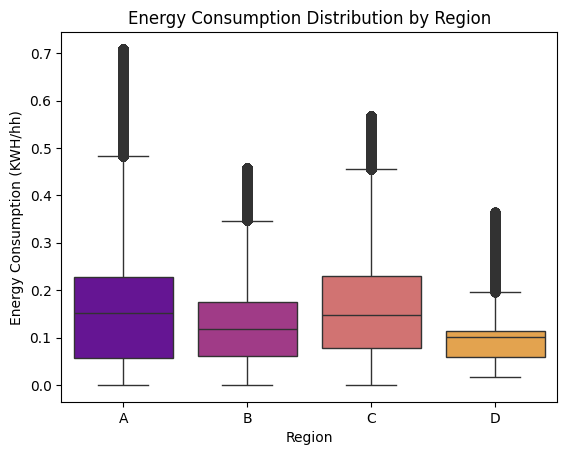

In [41]:
ax = sns.boxplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh_corrected', palette = "plasma")

for i, box in enumerate(ax.artists):
    box.set_edgecolor(palette[i])
    for line in box.get_children()[1:3]:
        line.set_color(palette[i])
        line.set_linewidth(1.5)

plt.title('Energy Consumption Distribution by Region')
plt.ylabel('Energy Consumption (KWH/hh)')
plt.xlabel('Region')

#Business Questions and Visualizations

- Which region has the highest average energy consumption?


<ipython-input-42-164bbee0e532>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh_corrected', ci="sd", palette = 'plasma')
<ipython-input-42-164bbee0e532>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh_corrected', ci="sd", palette = 'plasma')


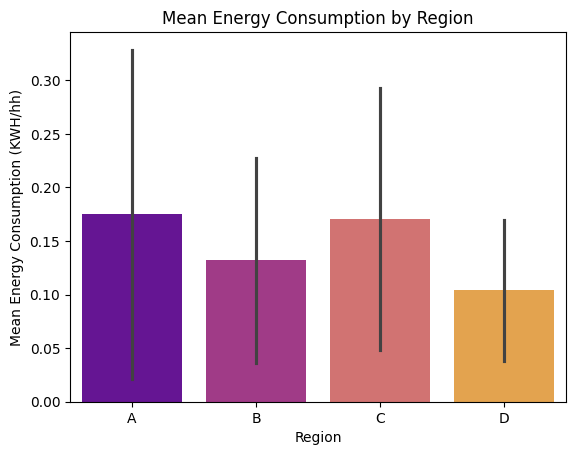

In [42]:
sns.barplot(data = combined_energy_consumption, x = 'Region', y = 'KWH/hh_corrected', ci="sd", palette = 'plasma')
plt.title('Mean Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Mean Energy Consumption (KWH/hh)')
plt.show()

<ipython-input-43-94199688392e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'KWH/hh_corrected', data=region_std, palette = 'plasma')


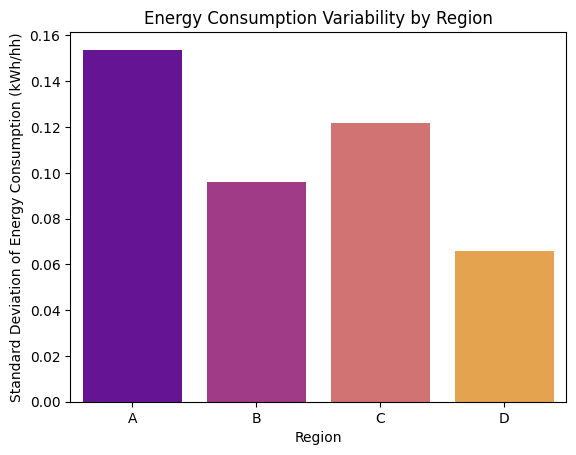

In [43]:
#Visualizing the region with the highest variability
region_std = combined_energy_consumption.groupby('Region')['KWH/hh_corrected'].std().reset_index()

sns.barplot(x = 'Region', y = 'KWH/hh_corrected', data=region_std, palette = 'plasma')
plt.title('Energy Consumption Variability by Region')
plt.xlabel('Region')
plt.ylabel('Standard Deviation of Energy Consumption (kWh/hh)')
plt.show()

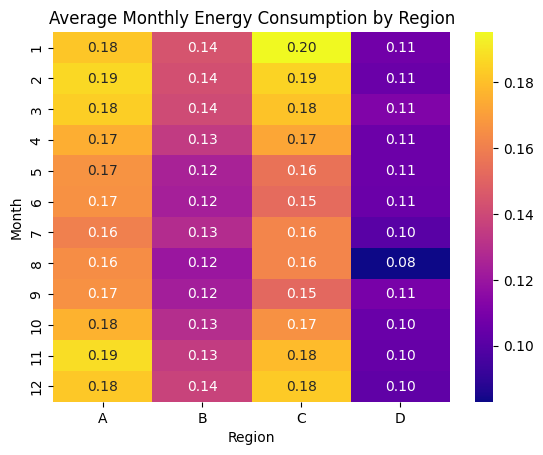

In [44]:
monthly_consumption = combined_energy_consumption.groupby(['Month', 'Region'])['KWH/hh_corrected'].mean().reset_index()
monthly_consumption = monthly_consumption.pivot(index='Month', columns='Region', values='KWH/hh_corrected')
sns.heatmap(monthly_consumption, cmap='plasma', annot=True, fmt=".2f")
plt.title('Average Monthly Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.show()

- How does energy consumption vary by time of day for each region?


<ipython-input-45-3994cf626e59>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=hourly_avg, x = 'Hour', y = 'KWH/hh_corrected', palette = 'plasma')


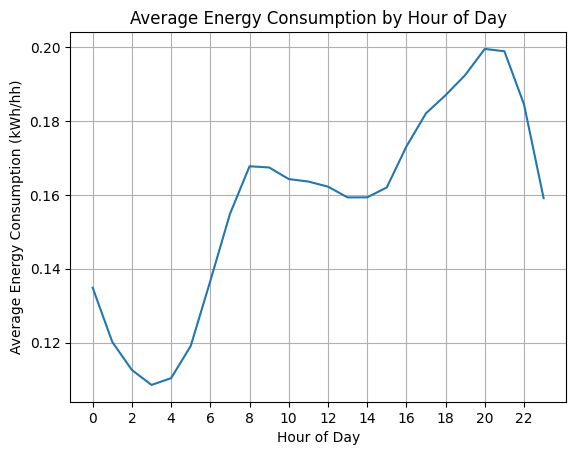

In [45]:
hourly_avg = combined_energy_consumption.groupby('Hour')['KWH/hh_corrected'].mean().reset_index()

sns.lineplot(data=hourly_avg, x = 'Hour', y = 'KWH/hh_corrected', palette = 'plasma')
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.grid(True)
even_hours = [hour for hour in range(24) if hour % 2 == 0]
plt.xticks(even_hours)
plt.show()

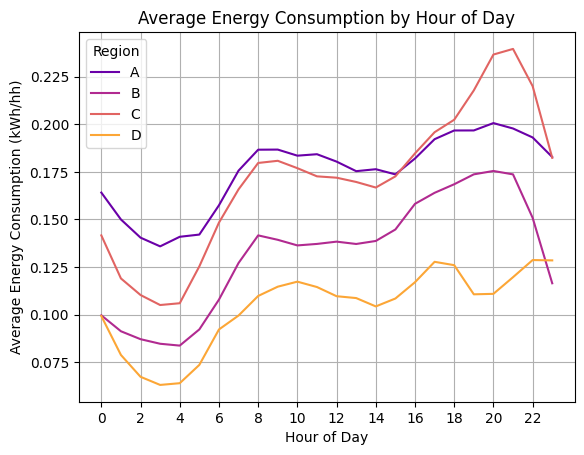

In [46]:
hourly_avg = combined_energy_consumption.groupby(['Region', 'Hour'])['KWH/hh_corrected'].mean().reset_index()

sns.lineplot(data=hourly_avg, x='Hour', y='KWH/hh_corrected', hue='Region', palette = 'plasma')
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.grid(True)
even_hours = [hour for hour in range(24) if hour % 2 == 0]
plt.xticks(even_hours)
plt.show()


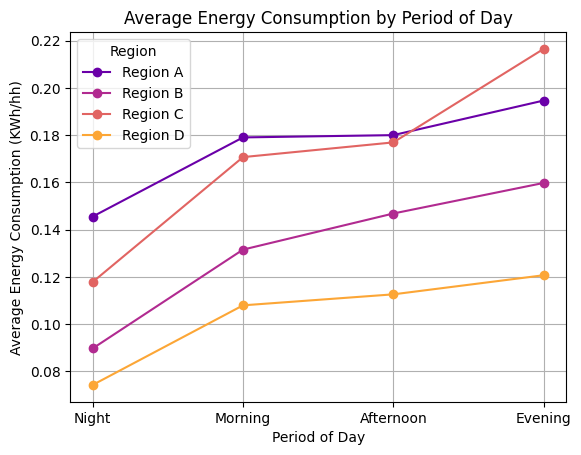

In [47]:
def classify_period(hour):
    if 0 <= hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

combined_energy_consumption['Period'] = combined_energy_consumption['Hour'].apply(classify_period)

period_avg = combined_energy_consumption.groupby(['Region', 'Period'])['KWH/hh_corrected'].mean().reset_index()

period_order = ["Night", "Morning", "Afternoon", "Evening"]
period_avg['Period'] = pd.Categorical(period_avg['Period'], categories=period_order, ordered=True)
period_avg = period_avg.sort_values(by='Period')

for region in period_avg['Region'].unique():
    region_data = period_avg[period_avg['Region'] == region]
    plt.plot(region_data['Period'], region_data['KWH/hh_corrected'], label = f'Region {region}', marker = 'o', color=sns.color_palette('plasma', n_colors=len(period_avg['Region'].unique()))[list(period_avg['Region'].unique()).index(region)])

plt.title('Average Energy Consumption by Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Average Energy Consumption (KWh/hh)')
plt.legend(title = "Region")
plt.grid(True)
plt.show()


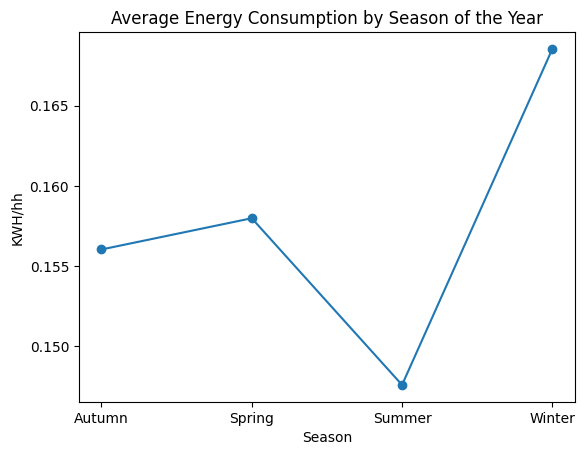

In [48]:
seasonal_avg = combined_energy_consumption.groupby('Season')['KWH/hh_corrected'].mean()

plt.plot(seasonal_avg, marker = 'o')
plt.title('Average Energy Consumption by Season of the Year')
plt.xlabel('Season')
plt.ylabel('KWH/hh')
plt.show()

In [49]:
hourly_avg = combined_energy_consumption.groupby('Hour')['KWH/hh_corrected'].mean().reset_index()
# print(hourly_avg)

peak_hours = hourly_avg.loc[hourly_avg['KWH/hh_corrected'] == hourly_avg['KWH/hh_corrected'].max(), 'Hour'].tolist()
# print(peak_hours)


#Statistical Tests

In [50]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 10.7 MB/s eta 0:00:00


In [51]:
region_summary = combined_energy_consumption.groupby('Region')['KWH/hh_corrected'].describe()
print(region_summary)

           count      mean       std    min    25%    50%    75%    max
Region                                                                 
A       490560.0  0.174793  0.153772  0.000  0.057  0.151  0.227  0.709
B       438000.0  0.131956  0.095773  0.000  0.061  0.117  0.175  0.458
C       350400.0  0.170481  0.121937  0.000  0.078  0.148  0.229  0.568
D        35040.0  0.103880  0.065808  0.016  0.059  0.101  0.114  0.364


# Does the region significantly affect energy consumption?

- H0: There is no sigificant difference between the means of the consumption energy across regions

- HA: There is a significant difference across regions

In [52]:
import pingouin as pg

#Applying ANOVA test
anova_results = pg.anova(data = combined_energy_consumption, dv = 'KWH/hh_corrected', between = 'Region', detailed = False)
p_value = anova_results.loc[0, 'p-unc']

#print(p_value)

if p_value < 0.05:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


# Is there a relationship between the time of day and energy consumption?

H0: There is no relation between time of day and energy consumption

HA: There is a relation between time of day and energy consumption

In [53]:
# Perform ANOVA to test if energy consumption differs by hour of day
anova_hour_results = pg.anova(data = combined_energy_consumption, dv = 'KWH/hh_corrected', between = 'Hour', detailed = True)

hour_p_value = anova_results.loc[0, 'p-unc']

if hour_p_value < 0.05:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [54]:
# # Perform ANOVA to test if energy consumption differs by period of day

# anova_period_results = pg.anova(data = combined_energy_consumption, dv = 'KWH/hh_corrected', between = 'Period', detailed = True)

# period_p_value = anova_results.loc[0, 'p-unc']

# if period_p_value < 0.05:
#   print("Reject Null Hypothesis")
# else:
#   print("Fail to Reject Null Hypothesis")

#Optimization

In [55]:
#Checking the validity of combining the two dataframes
total_energy_per_interval = combined_energy_consumption.groupby('DateTime')['KWH/hh'].sum()
print(total_energy_per_interval)

all_timestamps_match = all(demand['DemandDateTime'].isin(total_energy_per_interval.index))

print(f"Do all timestamps match? {all_timestamps_match}")

DateTime
2013-01-01 00:00:00    26.837
2013-01-01 00:30:00    27.711
2013-01-01 01:00:00    28.054
2013-01-01 01:30:00    24.296
2013-01-01 02:00:00    20.860
                        ...  
2013-12-31 21:30:00    25.559
2013-12-31 22:00:00    21.625
2013-12-31 22:30:00    20.213
2013-12-31 23:00:00    18.914
2013-12-31 23:30:00    18.916
Name: KWH/hh, Length: 17520, dtype: float64
Do all timestamps match? True


In [56]:
demand_energy_consumption = pd.merge(combined_energy_consumption, demand, left_on='DateTime', right_on='DemandDateTime')

In [57]:
demand_energy_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314000 entries, 0 to 1313999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Region            1314000 non-null  object        
 1   Site_id           1314000 non-null  object        
 2   Cell_id           1314000 non-null  object        
 3   DateTime          1314000 non-null  datetime64[ns]
 4   KWH/hh            1314000 non-null  float64       
 5   Hour              1314000 non-null  int32         
 6   Day               1314000 non-null  int32         
 7   DayType           1314000 non-null  object        
 8   Month             1314000 non-null  int32         
 9   Season            1314000 non-null  object        
 10  KWH/hh_AD         1314000 non-null  int64         
 11  KWH/hh_corrected  1314000 non-null  float64       
 12  Period            1314000 non-null  object        
 13  DemandDateTime    1314000 non-null  dateti

In [58]:
# #The average consumption for each demand category
# expected_consumption = demand_energy_consumption.groupby('Demand')['KWH/hh'].agg(['mean', 'std']).reset_index()

# print(expected_consumption)

In [59]:
# demand_energy_consumption['Demand'].value_counts()

In [60]:
# demand_energy_consumption.groupby('Demand')['KWH/hh_corrected'].sum().reset_index()


In [61]:
#Defining demand price mapping
demand_prices = {"High": 0.7721, "Normal": 0.1946, "Low": .0689}

#Mapping prices to the demand column
demand_energy_consumption['DemandPrice'] = demand_energy_consumption['Demand'].map(demand_prices)

#Calculating the cost for each row
demand_energy_consumption['TotalCost'] = demand_energy_consumption['KWH/hh_corrected'] * demand_energy_consumption['DemandPrice']

total_cost = demand_energy_consumption['TotalCost'].sum()

print(f"Total energy cost: {total_cost:.2f} EGP")

total_energy = demand_energy_consumption['KWH/hh_corrected'].sum()
print(f"Total energy consumed: {total_energy:.2f} kWh")


Total energy cost: 43704.15 EGP
Total energy consumed: 206919.66 kWh


In [62]:
# demand_energy_consumption['DemandPrice']

In [63]:
non_zero_data = demand_energy_consumption[demand_energy_consumption['KWH/hh_corrected'] > 0]

consumption_threshold = non_zero_data['KWH/hh_corrected'].quantile(0.25)
print(f"25th percentile threshold: {consumption_threshold:.2f} kWh")

low_energy_rows = demand_energy_consumption[demand_energy_consumption['KWH/hh_corrected'] <= consumption_threshold].copy()

price_mapping = {'High': 0.7721, 'Normal': 0.1946, 'Low': 0.0689}
low_energy_rows.loc[:, 'DemandPrice'] = low_energy_rows['Demand'].map(price_mapping)
low_energy_rows.loc[:, 'EnergySaved'] = low_energy_rows['KWH/hh_corrected']
low_energy_rows.loc[:, 'CostSaved'] = low_energy_rows['EnergySaved'] * low_energy_rows['DemandPrice']
low_energy_rows.loc[:, 'ShutDown'] = low_energy_rows['KWH/hh_corrected'] <= consumption_threshold

cells_shut_down_per_timestamp = low_energy_rows.groupby('DateTime')['ShutDown'].sum()

total_energy_saved = low_energy_rows['EnergySaved'].sum()
total_cost_saved = low_energy_rows['CostSaved'].sum()

print(f"Total energy saved: {total_energy_saved:.2f} kWh")
print(f"Total cost saved: {total_cost_saved:.2f} EGP")

# print("\nNumber of cells shut down at each timestamp:")
# print(cells_shut_down_per_timestamp.value_counts())


25th percentile threshold: 0.07 kWh
Total energy saved: 13841.88 kWh
Total cost saved: 2827.48 EGP


In [64]:
# plt.hist(combined_energy_consumption['KWH/hh_corrected'], bins=50, color='blue')
# plt.title('Energy Consumption Distribution')
# plt.xlabel('KWH/hh')
# plt.ylabel('Frequency')
# plt.show()

# percentiles = combined_energy_consumption['KWH/hh_corrected'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
# print("Key Percentiles:")
# print(percentiles)


In [65]:
demand_cost = demand_energy_consumption.groupby('Demand')['TotalCost'].sum().reset_index()

# plt.pie(demand_cost['TotalCost'], labels=demand_cost['Demand'], autopct='%1.1f%%', startangle=90)
# plt.title('Demand Percentage and Total Cost')

# legend_labels = [f'{demand}: {cost:.2f} EGP' for demand, cost in zip(demand_cost['Demand'], demand_cost['TotalCost'])]
# plt.legend(legend_labels, title='Demand and Total Cost', loc='best')

# plt.show()

In [66]:
demand_hour_energy = demand_energy_consumption.groupby(['Demand', 'Hour'])['KWH/hh_corrected'].sum().reset_index()

# sns.barplot(data = demand_hour_energy, x = 'Hour', y = 'KWH/hh_corrected', hue = 'Demand', width = 0.8, dodge = 0.2)
# plt.title('Energy Consumption by Demand and Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Total Energy Consumption (kWh)')
# plt.legend(title = 'Demand')
# plt.show()

In [67]:
demand_hour_cost = demand_energy_consumption.groupby(['Demand', 'Hour'])['TotalCost'].mean().reset_index()

# sns.lineplot(data = demand_hour_cost, x = 'Hour', y = 'TotalCost', hue = 'Demand')
# plt.title('Average Energy Cost by Demand and Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Average Cost (EGP)')
# plt.legend(title='Demand')
# plt.show()

#Saving Data to File

In [71]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
combined_energy_consumption.to_csv('/content/drive/MyDrive/Data Science/combined_energy_consumption.csv', index=False)
demand_energy_consumption.to_csv('/content/drive/MyDrive/Data Science/demand_energy_consumption.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
